# **Assignment 4 --- Pengcheng Wu 76544206**

**Q1** 

Functionally equivalent classification using Sk-Learn perform a classification investigarion using Support Vector Machines

*Strategy:*


1. Data Information 
2. Visualisation
3. Test / Train
4. Preprocessing
5. Modeling + Assessment
6. Tuning Pipline using 10 fold CV of train data



# **Data Information**

##Loading dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.info()
print("----------------------------------------------------------")
print(' ')
print('Data Shape: ',data.shape)
# id, diagnosis(target), mean * 10, se *10, worst * 10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 32 variables (incl. id) and 569 rows. there are 30 numeric variables, ID variable is int and diagnosis variable is object.

## Check for empty elements

In [7]:
print('Checking Missing Values: \n', data.isnull().sum())

Checking Missing Values: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


No missing values

## Convert Categorical Columns to Numeric

For setting up logistic regression later, we need to transfer the string type to numeric data type described.

In [8]:
df_ones = pd.get_dummies(data['diagnosis'])
datas = pd.concat((df_ones,data),axis=1)
datas = datas.drop(['diagnosis'],axis = 1)
datas = datas.drop(['M'],axis = 1)
datas = datas.rename(columns = {'B':'diagnosis'})
datas.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##diagnosis column data information

It is necessary to identify whether data are balanced or unbalanced. It can be observed that the dataset was not smoothly balanced. The below result apparently shows that B data values are more than M's



The number of M and B: 
 B    357
M    212
Name: diagnosis, dtype: int64


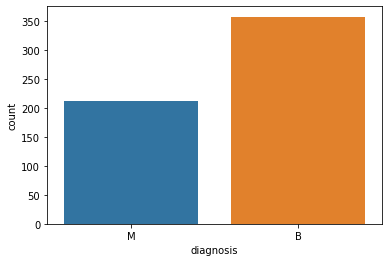

In [9]:
sns.countplot(x = 'diagnosis',data = data)
print ('The number of M and B: \n', data['diagnosis'].value_counts())

Covert the categorical variable 'diagnosis' to binary from 'M' & 'B' to 0 & 1

In [10]:
df_ones = pd.get_dummies(data['diagnosis'])
datas = pd.concat((df_ones,data),axis=1)
datas = datas.drop(['diagnosis'],axis = 1)
datas = datas.drop(['M'],axis = 1)
datas = datas.rename(columns = {'B':'diagnosis'})
df_id = data.id
datas = datas.drop('id',axis = 1)
datas.insert(0,'id',df_id)
datas[['diagnosis']]

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [11]:
datas = datas.drop('id',axis = 1) # ignore the id column

datas.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Visualisation 

##Plot Histogram of data to show the distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

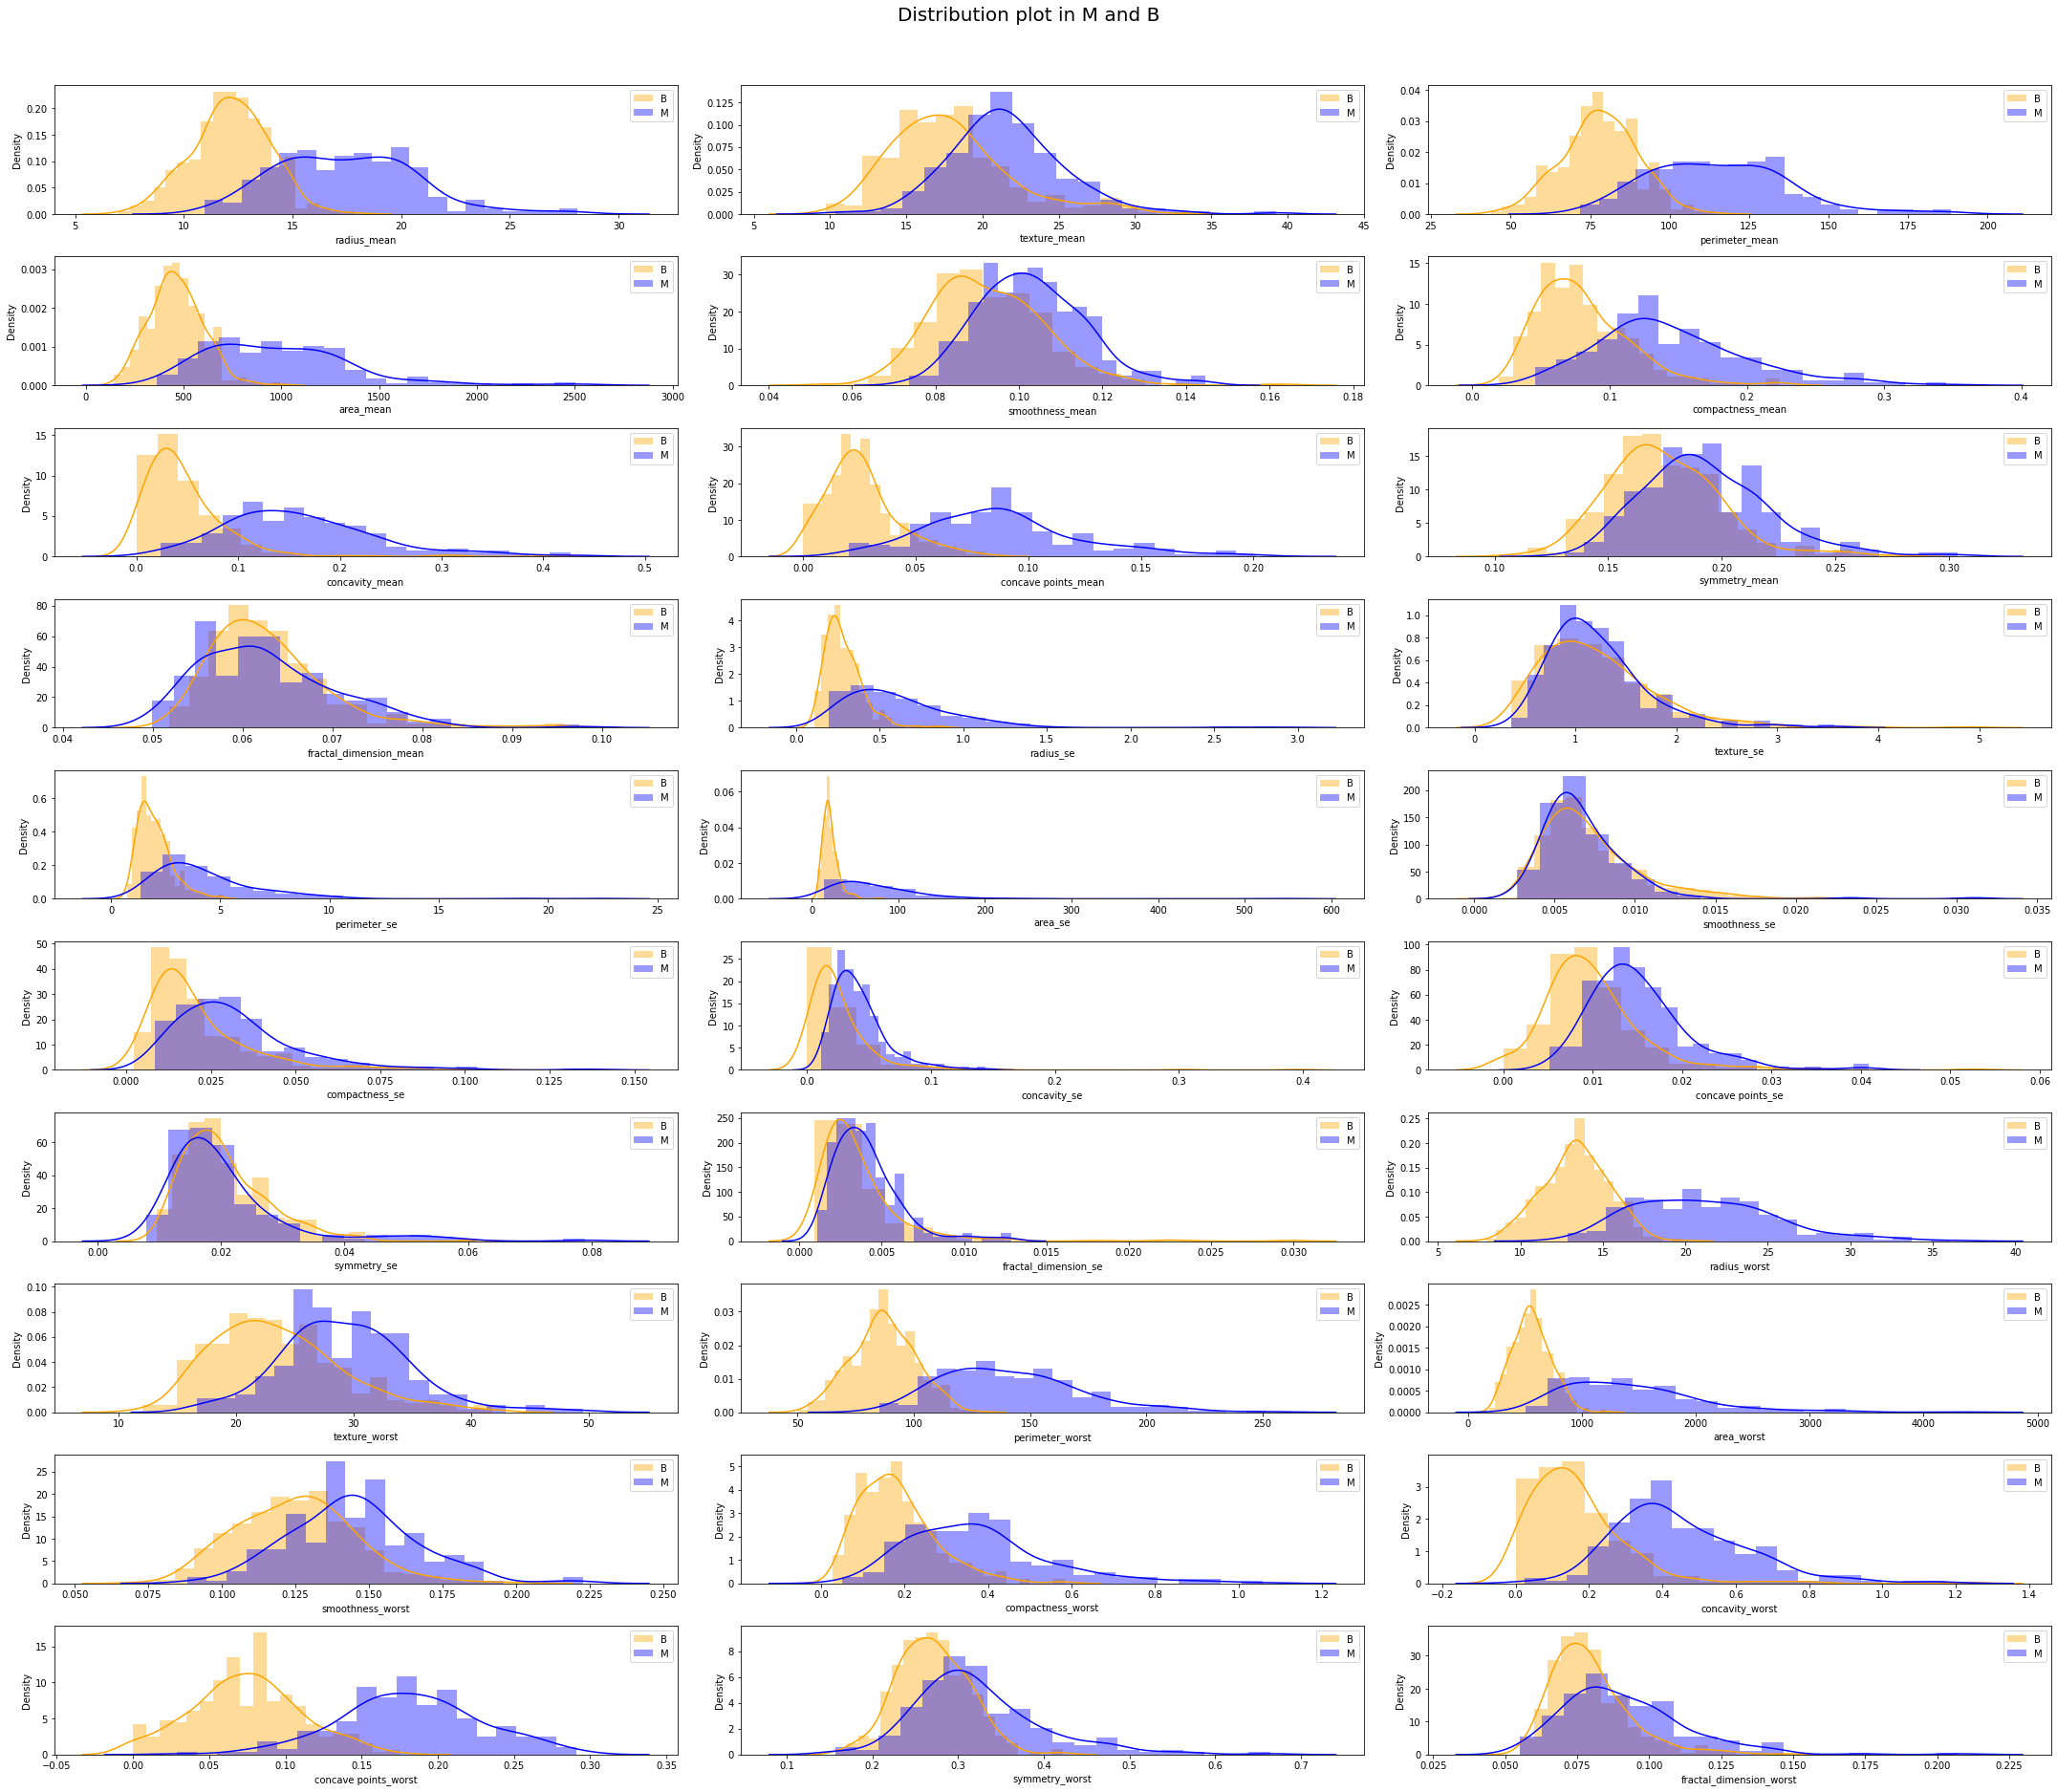

In [12]:
plt.figure(figsize = (30,25),tight_layout = True)
for i in range(1, len(list(datas.columns))):
    
    plt.subplot(10,3,i)
    
    sns.distplot(datas[list(datas.columns)[i]][datas['diagnosis'] == 1],label = 'B', color = 'orange', bins = 20,hist = True )
    sns.distplot(datas[list(datas.columns)[i]][datas['diagnosis'] == 0],label = 'M', color = "blue", bins = 20,hist = True)

    plt.legend()
plt.suptitle('Distribution plot in M and B', y=1.04, size=20)
plt.tight_layout()
plt.show()

From the above plots, the M's data in every variables tend to have approximate normal distribution; and the B's distributions potentially have right skewed trends.

## Box-plot for outliers distributions

As the above distribution hidtograms showing, we explore the outliers box plots for every variable and found that B's dataset includ more outliers. 

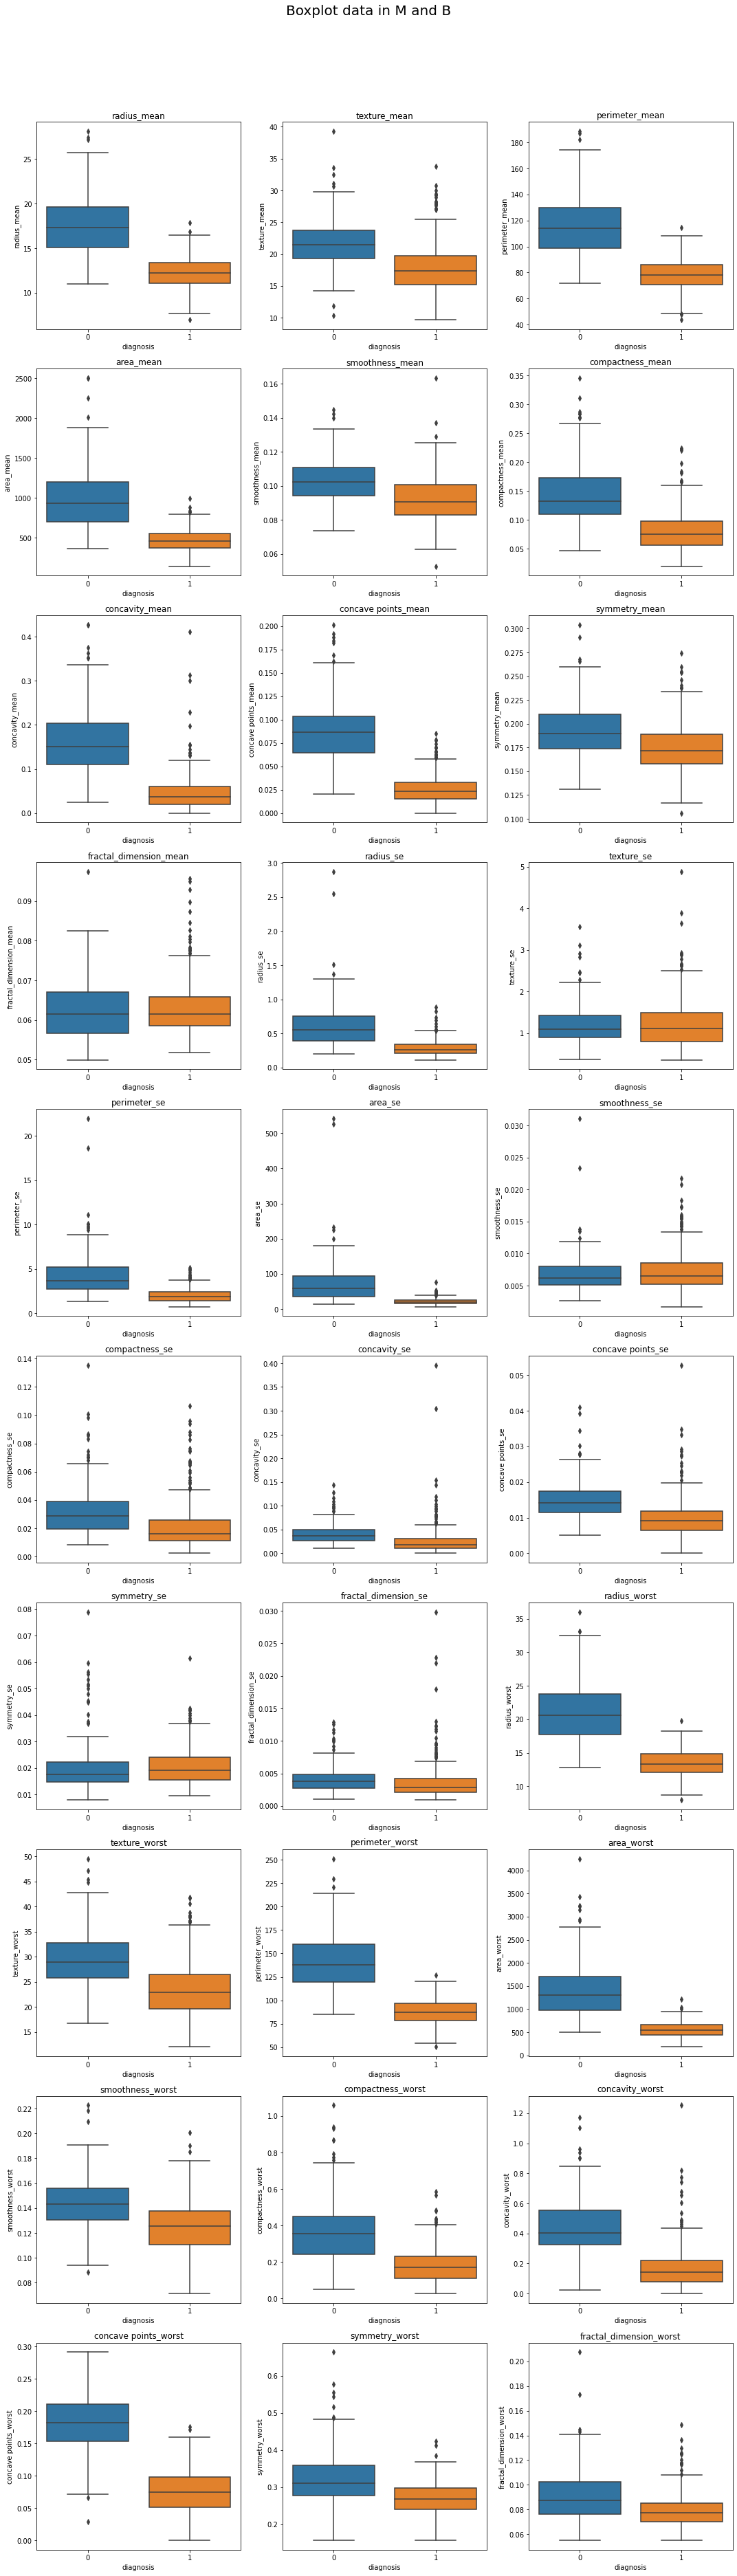

In [13]:
fig = plt.figure(figsize = (15,50),tight_layout=True)
for i in range(1, len(list(datas.columns))):
    ax = fig.add_subplot(10, 3, i)
    sns.boxplot(x=datas['diagnosis'],y= list(datas.columns)[i] , data=datas)
    ax.set_title(datas.columns[i])
    
plt.suptitle('Boxplot data in M and B', y=1.04, size=20)
plt.tight_layout()
plt.show()

## Correlation plot -- Checking for the correlation

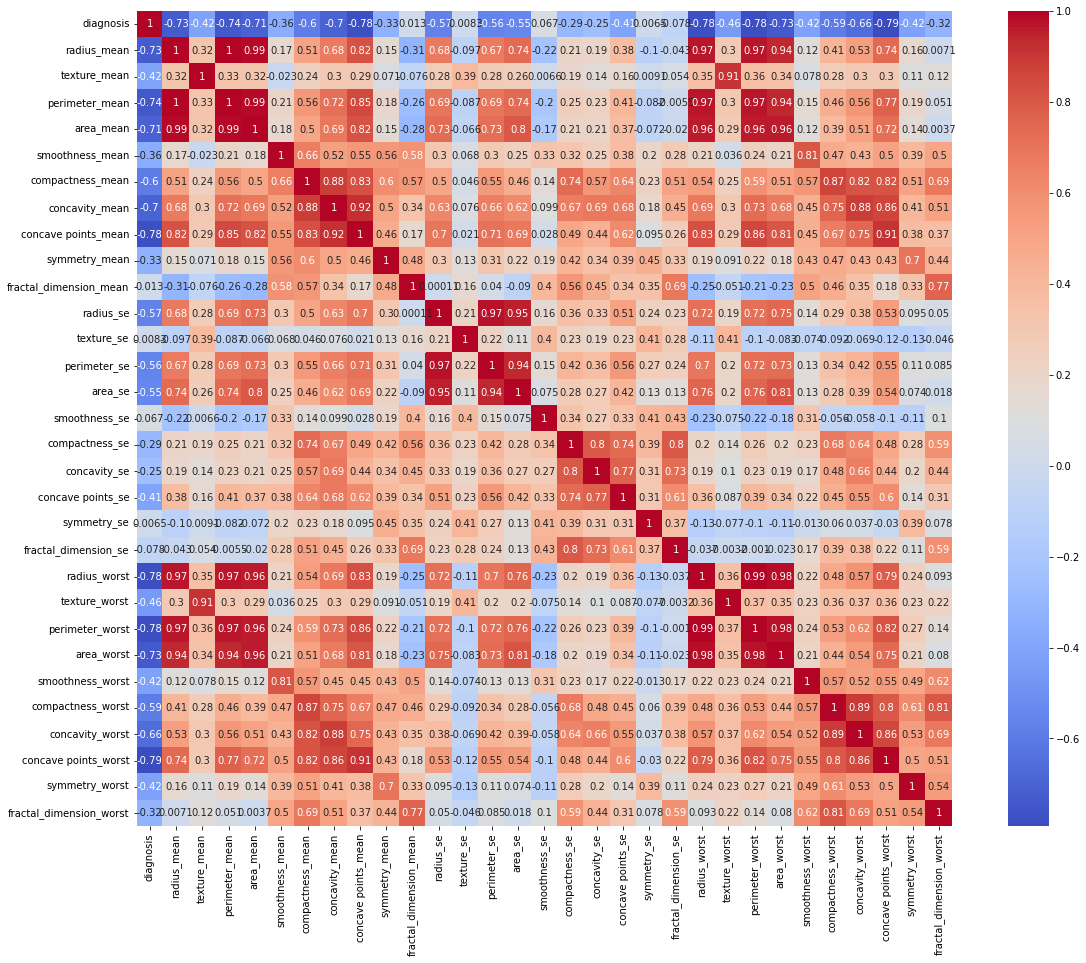

In [14]:
plt.figure (figsize = (20,15));
sns.heatmap(datas.corr(), annot = True, square = True, cmap = 'coolwarm');
plt.show()


In [15]:
datascorr = datas.corr()
high_correlation = datascorr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)

print(high_correlation_sort[30:35])

fractal_dimension_worst  fractal_dimension_worst    1.000000
perimeter_mean           radius_mean                0.997855
radius_mean              perimeter_mean             0.997855
radius_worst             perimeter_worst            0.993708
perimeter_worst          radius_worst               0.993708
dtype: float64


From the above Correlation plot, radius_mean has highly positive correlation with area_mean, radius_worst, preimeter_worst,area_worst & primeter_mean. area_mean has similar correlations pairs with radius_mean. There are also high positive correlation among primeter_se, area_se and radius_se. There are high correlations among Explatory variables to each other. We need to consider about multicollinearity issues.
There are less negative correlations between pairs of variables and mainly happens in correlating with diagnosis (target varibale).

## Pairs plot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.
It is apparent there are two classes in the dataset.



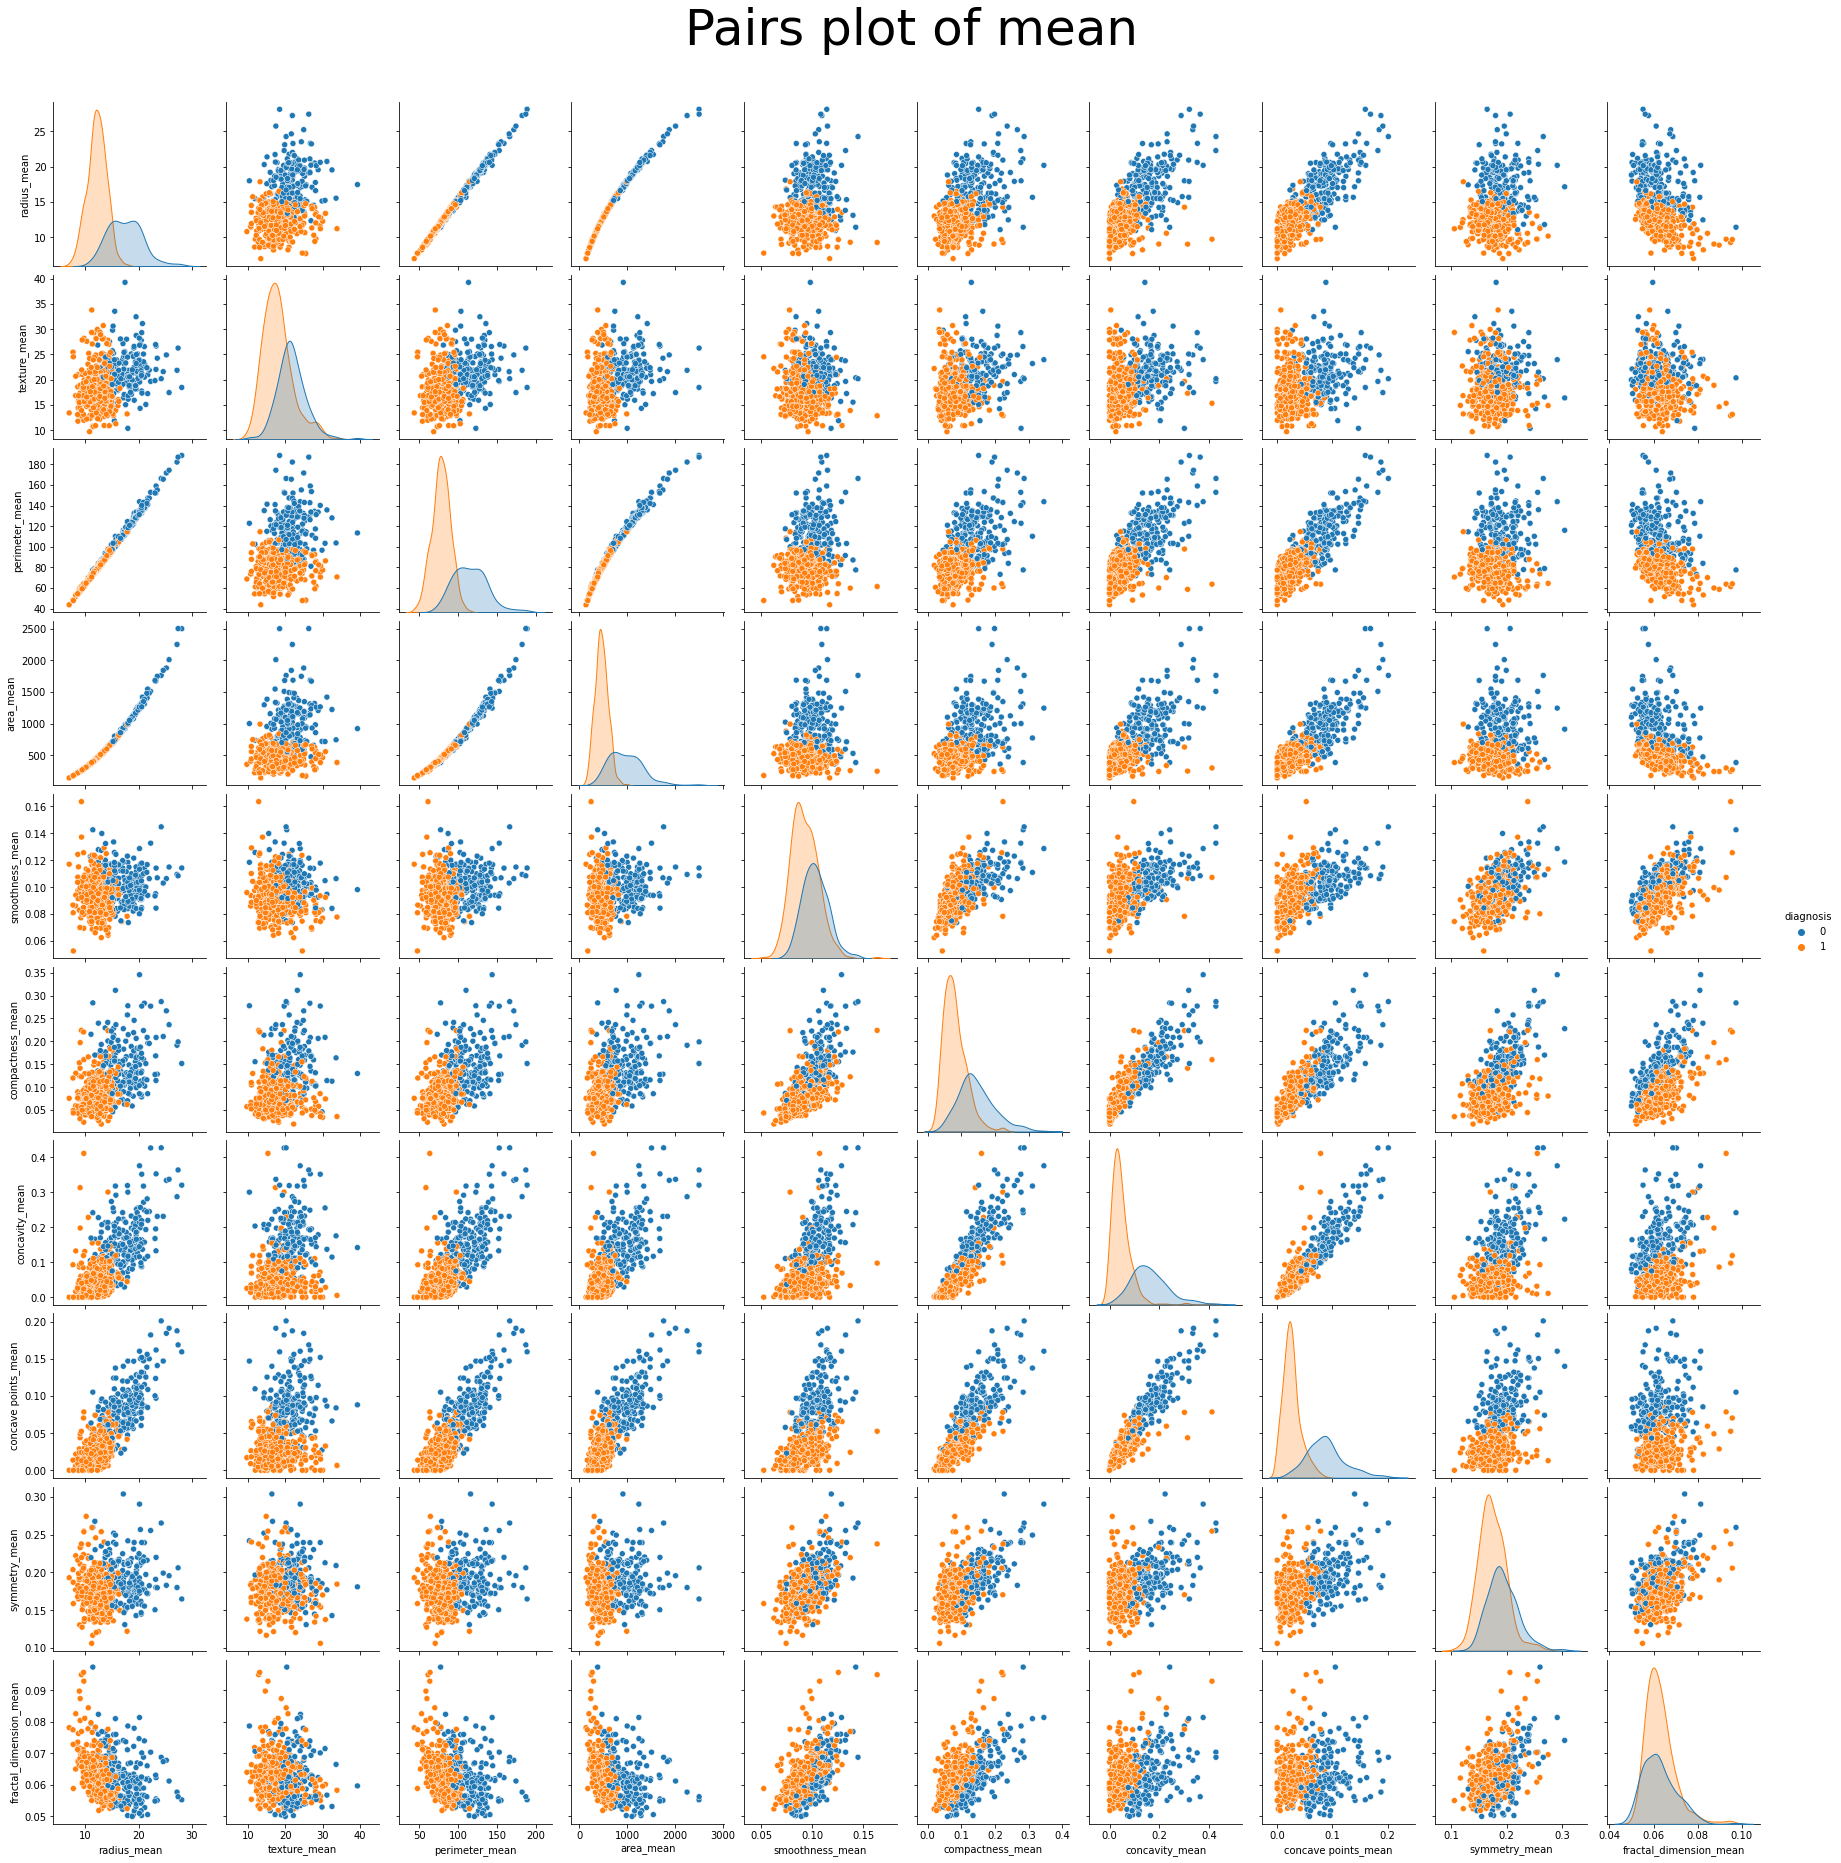

In [16]:
sns.pairplot(datas, hue='diagnosis',vars=list(datas.columns[1:11]))
plt.suptitle('Pairs plot of mean', y=1.04, size=50)
plt.show()

# **Test/ train**

Splitting Train and Test

Following 70/30 ~ train/test

In [18]:
target = 'diagnosis'
X = datas.drop([target],axis = 1)
Y = datas[target]
x_train0, x_test0, y_train0, y_test0 = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 123)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train0.shape,y_train0.shape,'\nTesting set   ---> ', x_test0.shape,'', y_test0.shape)

Original set  --->  (569, 30) (569,) 
Training set  --->  (398, 30) (398,) 
Testing set   --->  (171, 30)  (171,)


# **Preprocessing**
*   diagnosis is the target
*   id is the identifier (already ignore before)
*   up-sample the minority class using SMOTE to rebalance the training data.
*   normalise the numeric predictors 
*   experiment with dimensional reduction to 5 components


## Rebalance the training data using Borderline SMOTE

Performance of predicted models is greatly affected when dataset is highly imbalanced and sample size increases. Overall, Imbalanced training data have a major negative impact on performance.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point on the line.

Class to perform over-sampling using SMOTE


In [19]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE 
upsample = BorderlineSMOTE(random_state = 70)
x_train1, y_train1 = upsample.fit_resample(x_train0, y_train0)
counter = Counter(y_train1)
print(counter)

Counter({1: 254, 0: 254})


1 means B;
0 means M 

Traning data balanced

## Normalize the predictor data

data normalisation aims to remove data redundancy.

In [35]:
from sklearn import preprocessing
x_train2 = pd.DataFrame(preprocessing.normalize(x_train1,axis = 0))
x_test2 = pd.DataFrame(preprocessing.normalize(x_test0,axis = 0))


##UMAP

a general purpose manifold learning and dimension reduction algorithm. It is designed to be compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines.
This part is just to explore the UMAP application in Python and visualisation the effect of reducing dimensionality.

(508, 15)


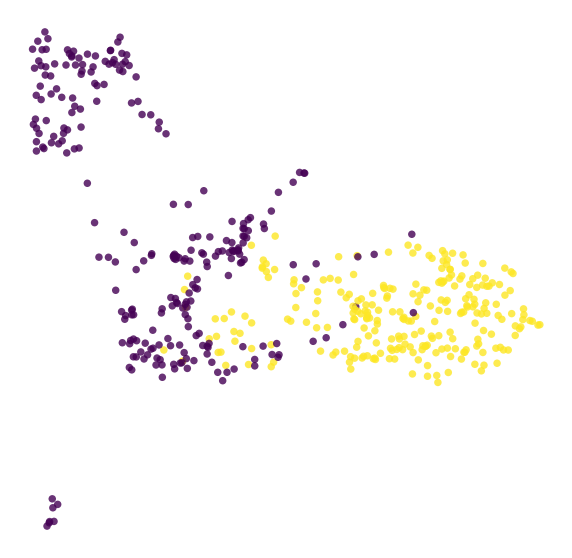

In [51]:
# embedding for x_train
embedding_xtrains = UMAP(n_neighbors=10,
                      min_dist=0.3,
                      n_components= 15
                      ).fit_transform(x_train2)    
print(embedding_xtrains.shape)              
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(embedding_xtrains[:,0], embedding_xtrains[:,1], 
            c=y_train1, 
            edgecolor='none', 
            alpha=0.80, 
            s=56)
plt.axis('off');

(171, 15)


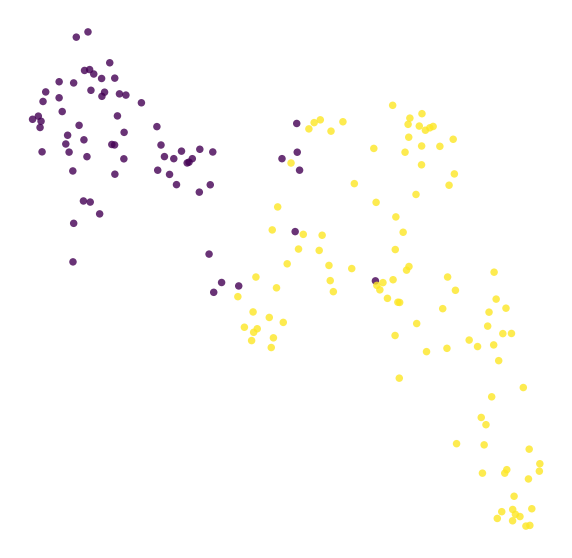

In [49]:
# embedding for x_test
embedding_xtests = UMAP(n_neighbors=10,
                      min_dist=0.3,
                      n_components = 15
                      ).fit_transform(x_test2) 
print(embedding_xtests.shape)                 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(embedding_xtests[:,0], embedding_xtests[:,1], 
            c=y_test0, 
            edgecolor='none', 
            alpha=0.80, 
            s=56)
plt.axis('off');

From the above both graphs, it is apparent that the dimensionality is reduced with M and B.

# **Modeling + Assessment**
Building a radial basis function without Pipelines combines all methods together.

SVM is a binary linear classification whose decision boundary is explicitly constructed to minimize generalization error. It is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection.

Confusion Metrics
      predicted_B  predicted_M
is_B           59           44
is_M            0           68
#######################################################
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        68
           1       1.00      0.57      0.73       103

    accuracy                           0.74       171
   macro avg       0.80      0.79      0.74       171
weighted avg       0.84      0.74      0.74       171



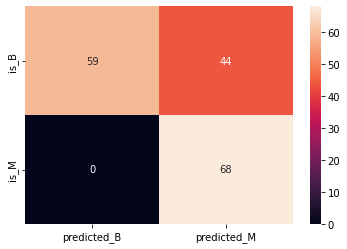

In [52]:
# Train SVM model with Normalized datasets
from sklearn.svm import SVC
svm_models = SVC(kernel = 'rbf',probability = True,C=0.001).fit(embedding_xtrains, y_train1)

# Prediction 
y_predictn = svm_models.predict(embedding_xtests)

# Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test0,y_predictn, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_B','is_M'], columns = ['predicted_B','predicted_M'])
print('Confusion Metrics')
print(confusion)
sns.heatmap(confusion,annot=True)
print('#######################################################')

print(classification_report(y_test0,y_predictn))

Try to use pipeline combine: Base Model + SMOTE + Normalisation

In [25]:
from pandas.core.common import random_state
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

umaps = UMAP(n_components= 15)
svms = SVC(kernel = 'rbf', random_state = 5, gamma = 0.1, C=10)
pipeline = Pipeline(steps=[('smote',BorderlineSMOTE(random_state = 70)),('scale', StandardScaler()),('umap',umaps),('svc',svms)])

params_grid_pipeline = {
    "umap__n_neighbors" : [5, 10],
    "umap__n_components" : [10,15], 
    "svc__C" : [0.001,0.01,0.1,1,10]
}
model_pipelines = GridSearchCV(pipeline, params_grid_pipeline,cv=10)
model_pipelines.fit(x_train0,y_train0)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote',
                                        BorderlineSMOTE(random_state=70)),
                                       ('scale', StandardScaler()),
                                       ('umap', UMAP(n_components=15)),
                                       ('svc',
                                        SVC(C=10, gamma=0.1, random_state=5))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'umap__n_components': [10, 15],
                         'umap__n_neighbors': [5, 10]})

      predicted_B  predicted_M
is_B           89           14
is_M            1           67
#######################################################
              precision    recall  f1-score   support

           0       0.83      0.99      0.90        68
           1       0.99      0.86      0.92       103

    accuracy                           0.91       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

TP=67, FP=14, TN=89, FN=1
Sensitivity: 0.985
Specificity: 0.864
Accuracy: 0.912
Balanced Accuracy: 0.924
MCC: 0.833
Precision:0.827
F1_Score:0.899


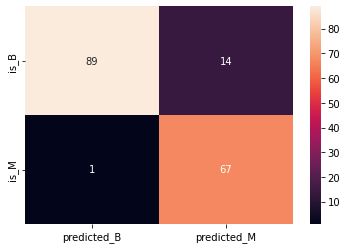

In [ ]:
# applying the trained model to test data
y_predictions = model_pipelines.predict(x_test0)

# Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import math
cm_new = np.array(confusion_matrix(y_test0,y_predictions, labels=[1,0]))
confusion_new = pd.DataFrame(cm_new, index=['is_B','is_M'], columns = ['predicted_B','predicted_M'])
tn, fp, fn, tp = cm_new.ravel()
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
mcc = round(((tp*tn)-(fp*fn))/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))), 3);
precision = round(tp/(tp+fp), 3);
f1_score = round((2*tp)/((2*tp)+fp+fn), 3);

print(confusion_new)
sns.heatmap(confusion_new,annot=True) 
# ConfusionMatrixDisplay(cm)
print('#######################################################')

print(classification_report(y_test0,y_predictions))

print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
print("Sensitivity: {0}".format(sensitivity));
print("Specificity: {0}".format(specificity));
print("Accuracy: {0}".format(accuracy));
print("Balanced Accuracy: {0}".format(balanced_accuracy));
print("MCC: {0}".format(mcc));
print("Precision:{0}".format(precision));
print("F1_Score:{0}".format(f1_score));

In [ ]:
model_pipelines.best_params_

{'svc__C': 0.001, 'umap__n_components': 15, 'umap__n_neighbors': 10}

Conclusion:
From the above two results, the basic model uses data preprocessing (rebalance, normalize and UMAP reduing dimension)  and fitting the model with SVM-radial get that accuracy is 0.56, and the precision is high and recall is one. The model could be overfitting.

When I try to use pipeline to integrate the preprocessing method and setting up the ranges of each parameter. The model accuracy is 0.91 correct overall; also, the precision of Class_0 is 0.83 which is higher than the basic model. Because Class_0 means the malignant variable, I think that recall should also be considered as one of important standards. The recall of Class_0 is 0.99. It means that the model detect this variable many times. The model is good for predicting Malignant variables. For the benign variable, the precision and recall are good with good f1-score. This model is also good for predicting Benign. 

Finally, I get the best parameters which are C (how much misclassification avoid) = 0.001, n_components (reduced dimension space) = 15, and n_neighbors (Controlling local vs. global structure) = 10. I find that the metric type of UMAP is one of important factors for the finnal fitting effect. Compared with the basic model, Pipeline makes the data process more clear and readability.
The advantage of SMOTE do not generate duplicates, but rather creating synthetic data points that will not interpret the orginal data. UMAP provides more convienent to tune parameters with users.
